# Ethereum

In [1]:
#Import relevant packages
import matplotlib.pyplot as plt
import math
import numpy as np
plt.style.use('classic')
%matplotlib inline

In [2]:
#Set parameters
nodes=[2721080]#note that this is the total number of addresses in the ieee dataset
nodes1=[2291941] #this is the number of nodes in the mfg graph
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum']
markers=['s','D','8','v','*','^','<','+']


[(1.0, 0.9998992120652319), (0.99, 0.9898441102977781), (0.98, 0.9871555157833468), (0.97, 0.9847143970983546), (0.96, 0.9823142916855189), (0.95, 0.9798686353619049), (0.94, 0.9773137702933892), (0.93, 0.9746956400710141), (0.92, 0.9719868879696293), (0.91, 0.9691834562931594), (0.9, 0.9662952493105189), (0.89, 0.9632885401500301), (0.88, 0.960197448363636), (0.87, 0.9569734997541386), (0.86, 0.9536712768784187), (0.85, 0.9502542604718011), (0.84, 0.9467268136483443), (0.83, 0.9430748871807783), (0.82, 0.9393237434995055), (0.81, 0.9354512179851051), (0.8, 0.931463462628401), (0.79, 0.9273570742004267), (0.78, 0.9231408661915819), (0.77, 0.9187904487942753), (0.76, 0.9142959613707334), (0.75, 0.90968716035884), (0.74, 0.9049369071891467), (0.73, 0.9000767471763019), (0.72, 0.8950861736842265), (0.71, 0.8899679354747789), (0.7, 0.8846874330534686), (0.69, 0.8792810111604094), (0.68, 0.8737080928348506), (0.67, 0.8679919334747274), (0.66, 0.8621369398252396), (0.65, 0.8561035820730115),

<Figure size 432x288 with 0 Axes>

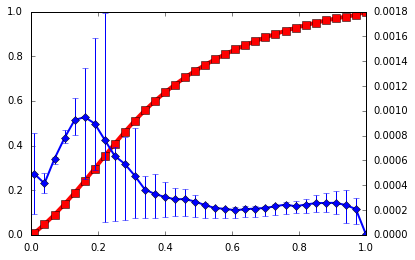

In [5]:
# read in and plot from the files
plt.clf()
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
runs=100
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
#ax2.set_yscale("log", nonposy='clip')

for x in range(len(nodes)):
    gcc_run=[]
    sgcc_run=[]
    p_run=[]
    for r in range(0,runs):
        filestring="ethereum/results/ieee-infocom2018/S_vals_ethereum_100comp_"+str(nodes[x])+"_random_linkperc__"
        filestring+=str(r)+".txt"
        filename=open(filestring)
        p_vals=[]
        gcc=[]
        sgcc=[]
        for line in filename.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                sg=float(sg)/nodes1[x]
                p_vals.append(abs(float(p)))
                gcc.append(g)
                sgcc.append(sg)
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        p_run=p_vals
        gcc_run.append(gcc)
        sgcc_run.append(sgcc)
        
        '''plt.clf()
        plt.plot(p_run[::1], gcc[::1], marker=markers[x], linestyle='-', color=marker_colors[r % 8], label=("" ))
        plt.xlabel(r"$p$", fontsize=36)
        plt.xticks([x/5. for x in range(0,6)])
        xx,locs=plt.xticks()
        ll=xx
        plt.xticks(xx,ll, fontsize=20)
        plt.yticks(fontsize=20)
        #plt.axis([0.,1.0,0,0.2])
        plt.ylabel(r"$P_\infty$", fontsize=36)
        plt.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':20})
        plt.tight_layout()
        #plt.show()
        filestring="plot_ieee_ethereum%d.pdf" % r
        #plt.savefig(filestring)'''

    gcc_avg=[np.mean([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]
    gcc_std=[np.std([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]

    sgcc_avg=[np.mean([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_std=[np.std([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_25=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],25)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    sgcc_75=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],75)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    #print(gcc_std)
    #print len(p_run), len(gcc_avg)
    #plt.plot(p_run[::2], gcc_avg[::2], marker=markers[x], linestyle='None', color=marker_colors[x], label=(r"$z=$%s" % (networks[x]-1) ))
    ax1.plot(p_run[::3], gcc_avg[::3],  lw=4, linestyle='-', markersize=8, color=marker_colors[x], label=("" ), marker=markers[x] )
    print(list(zip(p_run, gcc_avg)))
    errvals=[sgcc_25 [::3] , sgcc_75[::3]]
    ax2.errorbar(p_run[::3], sgcc_avg[::3],  lw=2, yerr=errvals,  elinewidth=1, linestyle='-', color=marker_colors[x+1], label=(""), marker=markers[x+1] )


In [4]:
ax1.set_xlabel(r"$p$", fontsize=36)
xx=[x/2. for x in range(0,3)]
ax1.set_xticks(xx)
ax1.set_xticklabels(xx, fontdict={'fontsize': 30})
yticks1=ax1.get_yticklabels()
#ax1.tick_params(axis='y',labelsize=30)
#plt.axis([0.,1.0,0,0.2])
ax1.set_yticks([0,1])
ax1.set_yticklabels([0,1], fontdict={'fontsize': 30})
ax1.set_ylabel(r"$S$", fontsize=48)

#ax2.tick_params(axis='y',labelsize=30)
ax2.set_yticks([0,0.002])
ax2.set_yticklabels([0,.002], fontdict={'fontsize': 24})
ax2.yaxis.set_label_coords(1.03,0.5)
ax2.set_ylabel(r"$SG (10^{-3})$", fontsize=48)
ax2.set_ylim(0,0.0020)
                
#ax1.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':30})

ax1.spines['left'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
#ax1.text(0.4,0.3, "Blockchain\nTransaction\nNetwork", fontsize=18, fontweight='bold')

ax2.set_ylabel(r"$SG$", labelpad=-50, fontsize=48)
fig.tight_layout()

#plt.show()
filestring="plot_ieee_ethereum_link_colored_%drun.pdf" %runs
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [5]:
#save the plot
fig.savefig(filestring)


# Matjaz

In [6]:
#Set parameters
nodes=[309]#note that this is the total number of addresses in the ieee dataset
nodes1=[309] #this is the number of nodes in the mfg graph
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum']
markers=['s','D','8','v','*','^','<','+']


<Figure size 432x288 with 0 Axes>

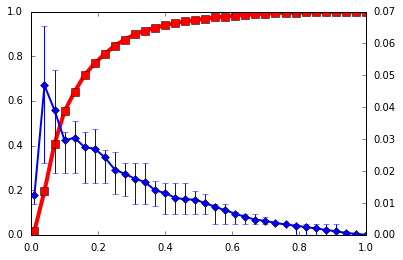

In [7]:
# read in and plot from the files
plt.clf()
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
runs=100
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
#ax2.set_yscale("log", nonposy='clip')

for x in range(len(nodes)):
    gcc_run=[]
    sgcc_run=[]
    p_run=[]
    for r in range(0,runs):
        filestring="da-cunha-matjaz/S_vals_ethereum_100comp_"+str(nodes[x])+"_matjaz_linkperc_no_count_exchange__"
        filestring+=str(r)+".txt"
        filename=open(filestring)
        p_vals=[]
        gcc=[]
        sgcc=[]
        for line in filename.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                sg=float(sg)/nodes1[x]
                p_vals.append(abs(float(p)))
                gcc.append(g)
                sgcc.append(sg)
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        p_run=p_vals
        gcc_run.append(gcc)
        sgcc_run.append(sgcc)
        
        '''plt.clf()
        plt.plot(p_run[::1], gcc[::1], marker=markers[x], linestyle='-', color=marker_colors[r % 8], label=("" ))
        plt.xlabel(r"$p$", fontsize=36)
        plt.xticks([x/5. for x in range(0,6)])
        xx,locs=plt.xticks()
        ll=xx
        plt.xticks(xx,ll, fontsize=20)
        plt.yticks(fontsize=20)
        #plt.axis([0.,1.0,0,0.2])
        plt.ylabel(r"$P_\infty$", fontsize=36)
        plt.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':20})
        plt.tight_layout()
        #plt.show()
        filestring="plot_ieee_ethereum%d.pdf" % r
        #plt.savefig(filestring)'''

    gcc_avg=[np.mean([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]
    gcc_std=[np.std([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]

    sgcc_avg=[np.mean([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_std=[np.std([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_25=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],25)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    sgcc_75=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],75)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    #print(gcc_std)
    #print len(p_run), len(gcc_avg)
    #plt.plot(p_run[::2], gcc_avg[::2], marker=markers[x], linestyle='None', color=marker_colors[x], label=(r"$z=$%s" % (networks[x]-1) ))
    ax1.plot(p_run[::3], gcc_avg[::3],  lw=4, linestyle='-', markersize=8, color=marker_colors[x], label=("" ), marker=markers[x] )
    errvals=[sgcc_25 [::3] , sgcc_75[::3]]
    ax2.errorbar(p_run[::3], sgcc_avg[::3],  lw=2, yerr=errvals,  elinewidth=1, linestyle='-', color=marker_colors[x+1], label=(""), marker=markers[x+1] )


In [8]:
ax1.set_xlabel(r"$p$", fontsize=36)
xx=[x/2. for x in range(0,3)]
ax1.set_xticks(xx)
ax1.set_xticklabels(xx, fontdict={'fontsize': 30})
yticks1=ax1.get_yticklabels()
#ax1.tick_params(axis='y',labelsize=30)
#plt.axis([0.,1.0,0,0.2])
ax1.set_yticks([0, 1])
ax1.set_yticklabels([0, 1], fontdict={'fontsize': 30})
ax1.set_ylabel(r"$S$", fontsize=48)

#ax2.tick_params(axis='y',labelsize=30)
ax2.set_yticks([0,0.07])
ax2.set_yticklabels([0,0.07], fontdict={'fontsize': 24})
ax2.set_ylabel(r"$SG$", fontsize=48)
ax2.set_ylim(0,0.07)
ax2.yaxis.set_label_coords(1.03,0.5)

#ax1.text(0.25,0.55, "Conspiracy Network", fontsize=18, fontweight='bold')
#ax1.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':30})

ax1.spines['left'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel(r"$SG$", labelpad=-50, fontsize=48)
fig.tight_layout()

#plt.show()
filestring="plot_matjaz_link_colored_%drun.pdf" %runs
#fig.show()

In [9]:
#save the plot
fig.savefig(filestring)


# Da-cunha

In [10]:
#Set parameters
nodes=[10407]#note that this is the total number of addresses in the ieee dataset
nodes1=[10407] #this is the number of nodes in the mfg graph
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum']
markers=['s','D','8','v','*','^','<','+']


9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.608917075045643e-05
9.60891707

<Figure size 432x288 with 0 Axes>

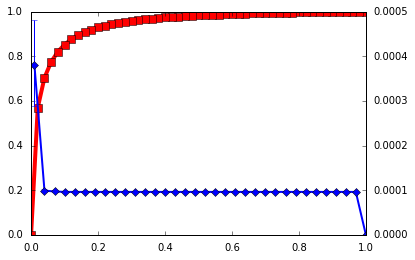

In [11]:
# read in and plot from the files
plt.clf()
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
runs=100
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
#ax2.set_yscale("log", nonposy='clip')

for x in range(len(nodes)):
    gcc_run=[]
    sgcc_run=[]
    p_run=[]
    for r in range(0,runs):
        filestring="da-cunha-matjaz/da-cunha/S_vals_ethereum_100comp_"+str(nodes[x])+"_dacunha_linkperc_no_count_exchange__"
        filestring+=str(r)+".txt"
        filename=open(filestring)
        p_vals=[]
        gcc=[]
        sgcc=[]
        for line in filename.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                sg=float(sg)/nodes1[x]
                p_vals.append(abs(float(p)))
                gcc.append(g)
                sgcc.append(sg)
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        print(gcc[-1])
        p_run=p_vals
        gcc_run.append(gcc)
        sgcc_run.append(sgcc)
        
        '''plt.clf()
        plt.plot(p_run[::1], gcc[::1], marker=markers[x], linestyle='-', color=marker_colors[r % 8], label=("" ))
        plt.xlabel(r"$p$", fontsize=36)
        plt.xticks([x/5. for x in range(0,6)])
        xx,locs=plt.xticks()
        ll=xx
        plt.xticks(xx,ll, fontsize=20)
        plt.yticks(fontsize=20)
        #plt.axis([0.,1.0,0,0.2])
        plt.ylabel(r"$P_\infty$", fontsize=36)
        plt.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':20})
        plt.tight_layout()
        #plt.show()
        filestring="plot_ieee_ethereum%d.pdf" % r
        #plt.savefig(filestring)'''

    gcc_avg=[np.mean([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]
    gcc_std=[np.std([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]

    sgcc_avg=[np.mean([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_std=[np.std([sgcc_run[rr][gg] for rr in range(len(sgcc_run))]) for gg in range(len(sgcc_run[0]))]
    sgcc_25=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],25)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    sgcc_75=[abs(np.percentile([sgcc_run[rr][gg] for rr in range(len(sgcc_run))],75)-sgcc_avg[gg]) for gg in range(len(sgcc_run[0]))]
    #print(gcc_std)
    #print len(p_run), len(gcc_avg)
    #plt.plot(p_run[::2], gcc_avg[::2], marker=markers[x], linestyle='None', color=marker_colors[x], label=(r"$z=$%s" % (networks[x]-1) ))
    ax1.plot(p_run[::2], gcc_avg[::2],  lw=4, linestyle='-', markersize=8, color=marker_colors[x], label=("" ), marker=markers[x] )
    errvals=[sgcc_25 [::3] , sgcc_75[::3]]
    ax2.errorbar(p_run[::3], sgcc_avg[::3],  lw=2, yerr=errvals,  elinewidth=1, linestyle='-', color=marker_colors[x+1], label=(""), marker=markers[x+1] )


In [12]:
ax1.set_xlabel(r"$p$", fontsize=36)
xx=[x/2. for x in range(0,3)]
ax1.set_xticks(xx)
ax1.set_xticklabels(xx, fontdict={'fontsize': 30})
yticks1=ax1.get_yticklabels()
#ax1.tick_params(axis='y',labelsize=30)
#plt.axis([0.,1.0,0,0.2])
ax1.set_yticks([0,1])
ax1.set_yticklabels([0,1], fontdict={'fontsize': 30})
ax1.set_ylabel(r"$S$", fontsize=48)

#ax2.tick_params(axis='y',labelsize=30)
ax2.set_yticks([0,0.0005])
ax2.set_yticklabels([0,r'$5\cdot10^{-4}$'], fontdict={'fontsize': 24})
ax2.set_ylabel(r"$SG$", fontsize=48)
ax2.set_ylim(0,0.0005)
                
#ax1.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':30})
#ax1.text(0.3,0.3, "Dark Web Network", fontsize=18, fontweight='bold')

ax1.spines['left'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

ax2.yaxis.set_label_coords(1.03,0.5)

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel(r"$SG$", labelpad=-50, fontsize=48)
fig.tight_layout()

#plt.show()
filestring="plot_dacunha_link_colored_%drun.pdf" %runs
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [13]:
#save the plot
fig.savefig(filestring)


# All Together

Blockchain 0.9998992120652319
Conspiracy 0.7648514851485149
Dark Web 1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 432x288 with 0 Axes>

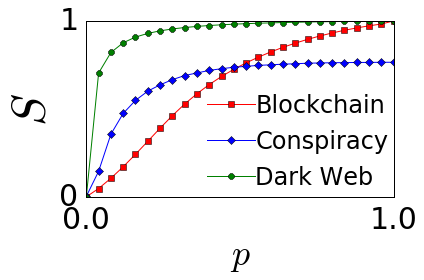

In [16]:
nodes=[2721080,404,10407]
nodes1=[2291941,404,10407]
filestring0="ethereum/results/ieee-infocom2018/S_vals_ethereum_100comp_"+str(nodes[0])+"_random_linkperc__"
filestring1="da-cunha-matjaz/S_vals_ethereum_100comp_"+str(nodes[1])+"_matjaz_linkperc_no_count_exchange__"
filestring2="da-cunha-matjaz/da-cunha/S_vals_ethereum_100comp_"+str(nodes[2])+"_dacunha_linkperc_no_count_exchange__"
filestrings=[filestring0,filestring1,filestring2]
labels=['Blockchain','Conspiracy','Dark Web']
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum']
markers=['s','D','8','v','*','^','<','+']
plt.clf()
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
runs=100
fig, ax1 = plt.subplots()

for x in range(len(nodes)):
    gcc_run=[]
    sgcc_run=[]
    p_run=[]
    for r in range(0,runs):
        filestring=filestrings[x]
        filestring+=str(r)+".txt"
        filename=open(filestring)
        p_vals=[]
        gcc=[]
        sgcc=[]
        for line in filename.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                sg=float(sg)/nodes1[x]
                p_vals.append(abs(float(p)))
                gcc.append(g)
                sgcc.append(sg)
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        #print(gcc[-1])
        p_run=p_vals
        gcc_run.append(gcc)
        sgcc_run.append(sgcc)
        
        '''plt.clf()
        plt.plot(p_run[::1], gcc[::1], marker=markers[x], linestyle='-', color=marker_colors[r % 8], label=("" ))
        plt.xlabel(r"$p$", fontsize=36)
        plt.xticks([x/5. for x in range(0,6)])
        xx,locs=plt.xticks()
        ll=xx
        plt.xticks(xx,ll, fontsize=20)
        plt.yticks(fontsize=20)
        #plt.axis([0.,1.0,0,0.2])
        plt.ylabel(r"$P_\infty$", fontsize=36)
        plt.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':20})
        plt.tight_layout()
        #plt.show()
        filestring="plot_ieee_ethereum%d.pdf" % r
        #plt.savefig(filestring)'''

    gcc_avg=[np.mean([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]
    gcc_std=[np.std([gcc_run[rr][gg] for rr in range(len(gcc_run))]) for gg in range(len(gcc_run[0]))]

    
    #print(gcc_std)
    #print len(p_run), len(gcc_avg)
    #plt.plot(p_run[::2], gcc_avg[::2], marker=markers[x], linestyle='None', color=marker_colors[x], label=(r"$z=$%s" % (networks[x]-1) ))
    ax1.plot(p_run[::4], gcc_avg[::4],  linestyle='-', color=marker_colors[x], label=labels[x], marker=markers[x] )
    print(labels[x],gcc_avg[0])
ax1.set_xlabel(r"$p$", fontsize=36)
xx=[x/1. for x in range(0,2)]
ax1.set_xticks(xx)
ax1.set_xticklabels(xx, fontdict={'fontsize': 30})
yticks1=ax1.get_yticklabels()
#ax1.tick_params(axis='y',labelsize=30)
#plt.axis([0.,1.0,0,0.2])
ax1.set_yticks([0,1])
ax1.set_yticklabels([0,1], fontdict={'fontsize': 30})
ax1.set_ylabel(r"$S$", fontsize=48)


                
ax1.legend( loc=(0.37,0), borderpad=0.3,numpoints=1, handletextpad=0, frameon=False, 
           prop={'size':24})



fig.tight_layout()

#plt.show()
filestring="plot_all_together_link_colored_%drun-stretched.pdf" %runs
fig.savefig(filestring)

fig.show()

# Shuffle Compared

FileNotFoundError: [Errno 2] No such file or directory: 'S_vals_ethereum_100comp_2721080_allexchanges_linkperc_no_count_exchange__0.txt'

<Figure size 640x480 with 0 Axes>

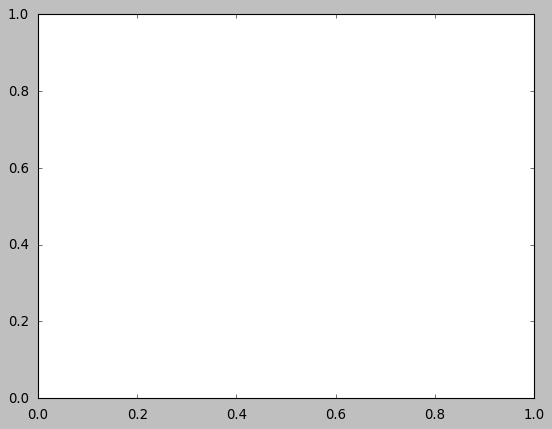

In [9]:
# read in and plot from the files

#Import relevant packages
import matplotlib.pyplot as plt
import math
import numpy as np
plt.style.use('classic')

#Set parameters
nodes=[2721080]#note that this is the total number of addresses in the ieee dataset
nodes1=[2291941] #this is the number of nodes in the mfg graph
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum']
markers=['s','D','8','v','*','^','<','+']

plt.clf()
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
runs=2
fig, ax1 = plt.subplots()
#ax2.set_yscale("log", nonposy='clip')
exchanges=["allexchanges"]

for x in range(len(nodes)):
    gcc_runs=[]
    gcc_shuffle_runs=[]
    p_run=[]
    for r in range(0,runs):
        filestring="S_vals_ethereum_100comp_"+str(nodes[0])+"_"+exchanges[x]+"_linkperc_no_count_exchange__"
        filestring+=str(r)+".txt"
        filename=open(filestring)
        p_vals=[]
        gcc=[]
        sgcc=[]
        for line in filename.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                sg=float(sg)/nodes1[x]
                p_vals.append(abs(float(p)))
                gcc.append(g)
                sgcc.append(sg)
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        p_run=p_vals
        gcc_runs.append(gcc)
        filename.close()
        
        filestring1="shuffle-degree/S_vals_ethereum_100comp_"+str(nodes[0])+"_"+exchanges[x]+"_linkperc_no_count_exchange_shuffle__"
        filestring1+=str(r)+".txt"
        filename1=open(filestring1)
        p_vals=[]
        gcc_shuffle=[]
        for line in filename1.readlines():
            if len(line.split())>1:
                p,g,sg=line.split()[0:3]
                g=(float(g))/(nodes1[x])
                gcc_shuffle.append(g)
                #sgcc.append(sg)
        filename1.close()
        #if k_inter_vals[x]==0:
        #    gcc=[modules[x]*ll for ll in gcc]
        
        gcc_shuffle_runs.append(gcc_shuffle)
        '''plt.clf()
        plt.plot(p_run[::1], gcc[::1], marker=markers[x], linestyle='-', color=marker_colors[r % 8], label=("" ))
        plt.xlabel(r"$p$", fontsize=36)
        plt.xticks([x/5. for x in range(0,6)])
        xx,locs=plt.xticks()
        ll=xx
        plt.xticks(xx,ll, fontsize=20)
        plt.yticks(fontsize=20)
        #plt.axis([0.,1.0,0,0.2])
        plt.ylabel(r"$P_\infty$", fontsize=36)
        plt.legend( loc="best", borderpad=0.3,numpoints=1, handletextpad=0, prop={'size':20})
        plt.tight_layout()
        #plt.show()
        filestring="plot_ieee_ethereum%d.pdf" % r
        #plt.savefig(filestring)'''

    gcc_avg=[np.mean([gcc_runs[rr][gg] for rr in range(len(gcc_runs))]) for gg in range(len(gcc_runs[0]))]
    gcc_std=[np.std([gcc_runs[rr][gg] for rr in range(len(gcc_runs))]) for gg in range(len(gcc_runs[0]))]

    gcc_shuffle_avg=[np.mean([gcc_shuffle_runs[rr][gg] for rr in range(len(gcc_shuffle_runs))]) for gg in range(len(gcc_shuffle_runs[0]))]
    gcc_shuffle_std=[np.std([gcc_shuffle_runs[rr][gg] for rr in range(len(gcc_shuffle_runs))]) for gg in range(len(gcc_shuffle_runs[0]))]
    gcc_shuffle_25=[abs(np.percentile([gcc_shuffle_runs[rr][gg] for rr in range(len(gcc_shuffle_runs))],25)-gcc_shuffle_avg[gg]) for gg in range(len(gcc_shuffle_runs[0]))]
    gcc_shuffle_75=[abs(np.percentile([gcc_shuffle_runs[rr][gg] for rr in range(len(gcc_shuffle_runs))],75)-gcc_shuffle_avg[gg]) for gg in range(len(gcc_shuffle_runs[0]))]
    #print(len(gcc_shuffle_25), len(gcc_shuffle_avg), len(gcc_avg))
    #print(gcc_std)
    #print len(p_run), len(gcc_avg)
    #plt.plot(p_run[::2], gcc_avg[::2], marker=markers[x], linestyle='None', color=marker_colors[x], label=(r"$z=$%s" % (networks[x]-1) ))
    ax1.plot(p_run[::3], gcc_avg[::3],  linestyle='-', color=marker_colors[x], label=("Original" ), marker=markers[x] )
    errvals=[gcc_shuffle_25[::3], gcc_shuffle_75[::3]]
    #print(errvals)
    ax1.errorbar(p_run[::3], gcc_shuffle_avg[::3], yerr=errvals,  linestyle='-', color=marker_colors[x+1], label=("Shuffled"), marker=markers[x+1] )
    #print(gcc_shuffle_avg[100], gcc_avg[100], errvals[-1])
ax1.set_xlabel(r"$p$", fontsize=36)
xx=[0,0.5,1]
ax1.set_xticks(xx)
ax1.set_xticklabels(xx, fontdict={'fontsize': 30})
yticks1=ax1.get_yticklabels()
#ax1.tick_params(axis='y',labelsize=30)
#plt.axis([0.,1.0,0,0.2])
ax1.set_yticks([0,0.5,1])
ax1.set_yticklabels([0,0.5,1], fontdict={'fontsize': 30})
ax1.set_ylabel(r"$S$", fontsize=48)


ax1.legend( loc="best", borderpad=0.3,numpoints=1, frameon=False, handletextpad=0, prop={'size':24})




fig.tight_layout()

#plt.show()
filestring="plot_ieee_ethereum_shuffled_2run.pdf"
fig.show()